## The dataset for this notebook comes from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Arrhythmia)

In [242]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import Imputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib notebook
#matplotlib.style.use('seaborn-notebook')

In [2]:
#
# Load the columns for the arrhythmia dataframe
#
columns = []
with open('datasets/columns') as f:
    for c in f:
        columns.append(c.strip())

In [36]:
arrhythmia = pd.read_csv('datasets/arrhythmia.data', header=None, names=columns)
arrhythmia.head()

,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,...,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [4]:
arrhythmia.shape

(452, 280)

In [5]:
arrhythmia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


In [6]:
arrhythmia.describe()

,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,...,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


## Quick check if dataset contains any NaN

In [7]:
def columns_with_nan(df):
    count = df.describe().loc['count']
    return count[count < df.shape[0]]

In [8]:
columns_with_nan(arrhythmia)

Series([], Name: count, dtype: float64)

# Split the dataset into training and test sets (80/20)

In [47]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=67)
sss

StratifiedShuffleSplit(n_splits=1, random_state=67, test_size=0.2,
            train_size=None)

In [48]:
for train_index, test_index in sss.split(arrhythmia, arrhythmia['Class']):
    train_set = arrhythmia.loc[train_index]
    test_set = arrhythmia.loc[test_index]

# Data Cleaning

### Which columns have missing values (?)

In [50]:
def has_missing_values(series):
    return np.any(series.str.find('?') == 0)

def missing_values_columns(df):
    missing_value_cols = []
    for col in df.dtypes[df.dtypes == 'object'].index:
        if has_missing_values(df[col]):
            missing_value_cols.append(col)
    
    return missing_value_cols

In [51]:
missing_value_cols = missing_values_columns(train_set)
print(missing_value_cols)

['T_angle', 'P_angle', 'QRST_angle', 'J_angle', 'Heart_rate']


### Assign NaN to examples with missing value

In [52]:
def replace_missing_value(df, columns, value=np.nan):
    for col in columns:
        df[col].replace('?', np.nan, inplace=True)

### Impute missing values with median

In [53]:
replace_missing_value(train_set, missing_value_cols)
imputer = Imputer(strategy='median')
imputer.fit(train_set)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [54]:
train_set = imputer.transform(train_set)
train_set = pd.DataFrame(train_set, columns=columns)
train_set.head()

,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,...,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area,Class
0,73,0,165,63,91,154,392,175,83,73,...,0,5.7,0,0,0,0.4,0.5,18.2,22.4,1
1,71,1,165,82,82,182,369,152,107,33,...,0,6.2,-3.5,0,0,0.6,1.3,2.6,11.4,1
2,22,1,165,52,108,184,406,218,114,24,...,-0.7,23.6,-3.4,0,0,0.6,-2.4,54,22.4,14
3,39,1,164,62,79,155,367,153,95,50,...,0,9.7,-0.7,0,0,0.8,1.3,24.1,33.7,1
4,37,0,190,85,100,137,361,201,73,86,...,0,15.6,-1.6,0,0,0.4,2.4,38,62.4,10


## Take a look at the spread of some of the columns

In [55]:
train_set.describe()

,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,...,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area,Class
count,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,...,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0
unique,73.0,2.0,50.0,72.0,63.0,102.0,122.0,121.0,84.0,145.0,...,21.0,121.0,54.0,2.0,1.0,22.0,69.0,242.0,278.0,13.0
top,46.0,1.0,160.0,70.0,82.0,157.0,383.0,152.0,100.0,62.0,...,0.0,6.3,0.0,0.0,0.0,0.5,1.2,18.1,33.7,1.0
freq,13.0,198.0,63.0,23.0,18.0,13.0,11.0,12.0,15.0,8.0,...,256.0,9.0,117.0,359.0,361.0,66.0,15.0,5.0,4.0,196.0


### There appear to be a lot of outliers in some of these columns

<IPython.core.display.Javascript object>


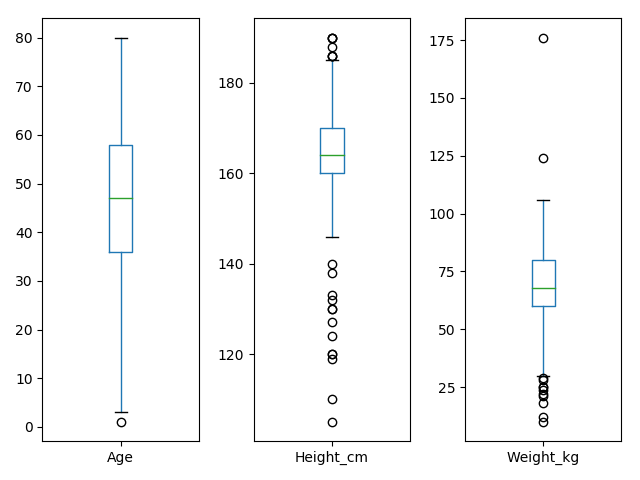

In [17]:
fig, axes = plt.subplots(1,3)
train_set.Age.plot.box(ax=axes[0])
train_set.Height_cm.plot.box(ax=axes[1])
train_set.Weight_kg.plot.box(ax=axes[2])
fig.tight_layout()

<IPython.core.display.Javascript object>


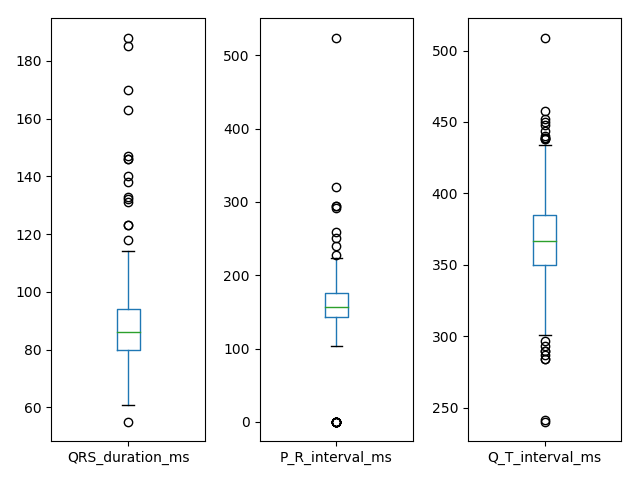

In [18]:
fig, axes = plt.subplots(1,3)
train_set.QRS_duration_ms.plot.box(ax=axes[0])
train_set.P_R_interval_ms.plot.box(ax=axes[1])
train_set.Q_T_interval_ms.plot.box(ax=axes[2])
fig.tight_layout()

<IPython.core.display.Javascript object>


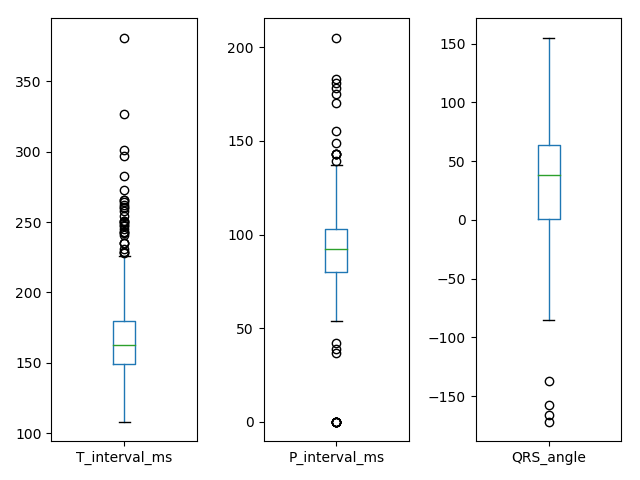

In [19]:
fig, axes = plt.subplots(1,3)
train_set.T_interval_ms.plot.box(ax=axes[0])
train_set.P_interval_ms.plot.box(ax=axes[1])
train_set.QRS_angle.plot.box(ax=axes[2])
fig.tight_layout()

<IPython.core.display.Javascript object>


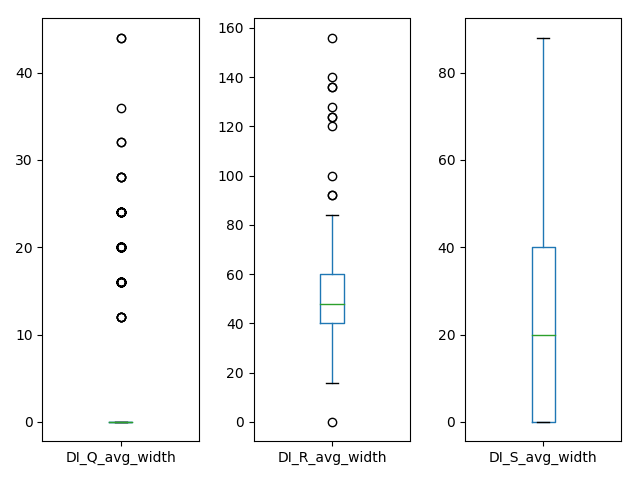

In [20]:
fig, axes = plt.subplots(1,3)
train_set.DI_Q_avg_width.plot.box(ax=axes[0])
train_set.DI_R_avg_width.plot.box(ax=axes[1])
train_set.DI_S_avg_width.plot.box(ax=axes[2])
fig.tight_layout()

<IPython.core.display.Javascript object>


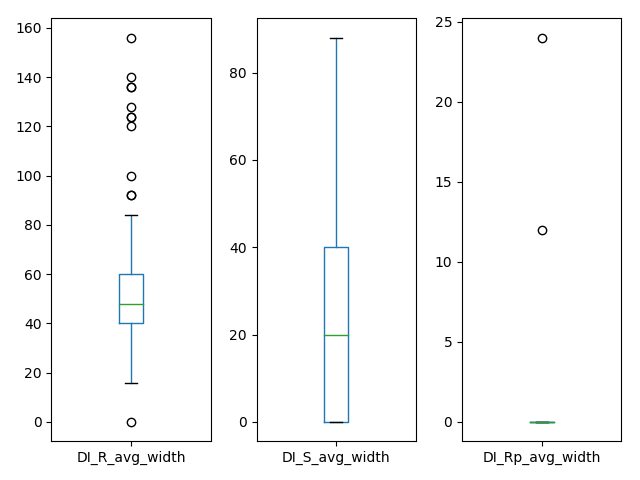

In [21]:
fig, axes = plt.subplots(1,3)
train_set.DI_R_avg_width.plot.box(ax=axes[0])
train_set.DI_S_avg_width.plot.box(ax=axes[1])
train_set.DI_Rp_avg_width.plot.box(ax=axes[2])
fig.tight_layout()

## Which features have the strongest correlation with Class?

In [22]:
corr_matrix = train_set.corr()
corr_matrix['Class'].sort_values(ascending=False)[:10]

Class                       1.000000
V1_Rp_avg_width             0.391630
V1_Intrinsic_deflections    0.348452
QRS_duration_ms             0.332424
V2_Rp_avg_width             0.267552
V1_Amplitude_Rp_mV          0.241796
DI_S_avg_width              0.232736
V2_Amplitude_Rp_mV          0.202361
AVR_R_avg_width             0.193123
V2_Diphasic_derivation_P    0.187809
Name: Class, dtype: float64

# Normalize the feature values

In [23]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [24]:
def remove_categorical_features(df):
    numeric_features = list(df)
    numeric_features.remove('Female')
    numeric_features.remove('Class')
    return numeric_features

In [25]:
numeric_features = remove_categorical_features(train_set)
train_set[numeric_features] = train_set[numeric_features].apply(normalize, axis=1)
train_set.head()

,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,...,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area,Class
0,1.832382,0.0,4.511928,1.541127,2.356641,4.191547,11.123416,4.803183,2.123637,1.832382,...,-0.293780,-0.127765,-0.293780,-0.293780,-0.293780,-0.282130,-0.279217,0.236304,0.358631,1.0
1,1.882444,1.0,4.774869,2.220920,2.220920,5.297967,11.052045,4.374853,2.990181,0.713167,...,-0.302259,-0.111482,-0.409956,-0.302259,-0.302259,-0.283797,-0.262257,-0.222256,0.048524,1.0
2,0.280494,1.0,3.925134,1.045104,2.472376,4.409387,10.067498,5.275944,2.625297,0.331468,...,-0.298060,0.321274,-0.366875,-0.280219,-0.280219,-0.264927,-0.341388,1.096078,0.290689,14.0
3,0.879320,1.0,4.775175,1.596157,2.125993,4.494674,11.102044,4.432340,2.624663,1.222155,...,-0.336187,-0.033869,-0.358004,-0.336187,-0.336187,-0.311254,-0.295670,0.414934,0.714136,1.0
4,0.646094,0.0,4.882345,1.975114,2.390433,3.414886,9.616979,5.186912,1.642859,2.002802,...,-0.378358,0.053573,-0.422659,-0.378358,-0.378358,-0.367283,-0.311907,0.673782,1.349368,10.0


## Split the training set into X, y

In [26]:
X_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]

# Start with dummy classifier for baseline

In [66]:
clf = DummyClassifier(random_state=67)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=67, strategy='stratified')

In [70]:
y_pred = clf.predict(X_train.iloc[:10])
print("Predictions:\n", list(y_pred))
print("Labels:\n", list(y_train.iloc[:10]))

Predictions:
 [2.0, 6.0, 10.0, 1.0, 1.0, 1.0, 10.0, 1.0, 4.0, 1.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]


In [71]:
clf.score(X_train.iloc[:10], y_train.iloc[:10])

0.29999999999999999

# Try logistic regression classifier

In [80]:
def score_model(clf, X, y, examples=10):
    y_pred = clf.predict(X.iloc[:examples])
    print("Predictions:\n", list(y_pred))
    print("Labels:\n", list(y.iloc[:examples]))
    print("Score:\n", clf.score(X.iloc[:examples], y.iloc[:examples]))

In [81]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 0.8


# Try SVM classifier

In [94]:
clf = SVC(kernel='linear') # poly (0.7), rbf (0.7)
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 0.9


# Try KNN classifier

In [89]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 0.7


# Try Decision Tree classifier

In [90]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 1.0


# Try Gradient Boosting classifier

In [91]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 1.0


# Try Random Forest classifier

In [95]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 0.9


# Try Neural Network classifier

In [126]:
clf = MLPClassifier(max_iter=500)
clf.fit(X_train, y_train)
score_model(clf, X_train, y_train)

Predictions:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Labels:
 [1.0, 1.0, 14.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 10.0]
Score:
 1.0


# Try these all again using cross validation

### Logistic Regression

In [273]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.65384615  0.69832402]
Avg Score: 0.6760850880962612


### SVM

In [118]:
clf = SVC(kernel='linear') # linear poly (0.7), rbf (0.7)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.62637363  0.60893855]
Avg Score: 0.61765608692983


### KNN

In [119]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.56043956  0.59217877]
Avg Score: 0.5763091656946406


### Decision Tree

In [120]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.57692308  0.54748603]
Avg Score: 0.562204555221315


### Gradient Boosting

In [270]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.64285714  0.67597765]
Avg Score: 0.659417398244214


### Most important features for Gradient Boosting

In [271]:
arrhythmia.columns[clf.feature_importances_.argsort()[::-1][:10]]

Index(['DII_Rp_avg_width', 'Heart_rate', 'V2_Amplitude_JJ_mV',
       'V3_Amplitude_Q_mV', 'DII_Q_avg_width', 'P_interval_ms',
       'V1_S_avg_width', 'Q_T_interval_ms', 'V2_Amplitude_P_mV',
       'V2_QRSTA_Area'],
      dtype='object')

In [272]:
clf.feature_importances_[clf.feature_importances_.argsort()[::-1][:10]]

array([ 0.04072196,  0.03724995,  0.03524764,  0.03037301,  0.02652754,
        0.02348697,  0.01806007,  0.0159943 ,  0.01489959,  0.01458783])

### Random Forest

In [288]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.59340659  0.64804469]
Avg Score: 0.6207256430720118


### Most important features for Random Forest

In [289]:
arrhythmia.columns[clf.feature_importances_.argsort()[::-1][:10]]

Index(['V1_Intrinsic_deflections', 'Heart_rate', 'Q_T_interval_ms',
       'V1_Rp_avg_width', 'AVF_Q_avg_width', 'V2_QRSA_Area',
       'V4_Amplitude_T_mV', 'DII_Amplitude_R_mV', 'AVR_Amplitude_T_mV',
       'V4_R_avg_width'],
      dtype='object')

In [290]:
clf.feature_importances_[clf.feature_importances_.argsort()[::-1][:10]]

array([ 0.03088391,  0.02929637,  0.01800042,  0.01797268,  0.01509852,
        0.01485999,  0.0144791 ,  0.01400013,  0.01354612,  0.01318192])

### Least import features for Random Forest

In [291]:
arrhythmia.columns[clf.feature_importances_.argsort()[::-1][-20:]]

Index(['AVR_S_avg_width', 'V3_Amplitude_Sp_mV', 'AVL_Diphasic_derivation_T',
       'DIII_Ragged_P', 'AVF_Ragged_R', 'DIII_Ragged_R',
       'AVF_Diphasic_derivation_R', 'AVF_Diphasic_derivation_P',
       'AVF_Ragged_T', 'AVF_Diphasic_derivation_T', 'DI_Amplitude_Rp_mV',
       'V1_Q_avg_width', 'V5_Diphasic_derivation_P', 'V1_Sp_avg_width',
       'V5_Ragged_P', 'V1_Ragged_R', 'V3_Amplitude_Rp_mV', 'DII_Rp_avg_width',
       'V1_Ragged_P', 'V6_Rp_avg_width'],
      dtype='object')

In [295]:
clf.feature_importances_[clf.feature_importances_.argsort()[::-1][-50:]]

array([ 0.0003903 ,  0.00039018,  0.00038918,  0.00038918,  0.00034583,
        0.00032001,  0.00025103,  0.00021833,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

### Neural Network

In [128]:
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=2)
print("Scores: {}".format(scores))
print("Avg Score: {}".format(scores.mean()))

Scores: [ 0.63736264  0.64804469]
Avg Score: 0.6427036650500337


## Try the most promising models using grid search:  Logistic Regression, SVM, Gradient Boosting, Neural Network

### Logistic Regression

In [137]:
clf = LogisticRegression()

param_grid = [
        {'penalty': ['l1', 'l2'], 'C': [.1, .3, 1, 3]}
    ]

grid = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best score: 0.6842105263157895
Best params: {'C': 1, 'penalty': 'l1'}


### SVM

In [140]:
clf = SVC()

param_grid = [
    {'C': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 'kernel': ['linear', 'poly', 'rbf']}
]

grid = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best score: 0.6537396121883656
Best params: {'C': 0.1, 'kernel': 'linear'}


### Gradient Boosting

In [142]:
clf = GradientBoostingClassifier()

param_grid = [
    {'learning_rate': [0.1, 0.3, 1.0, 3.0], 'n_estimators': [10, 30, 100, 300], 
     'max_depth': [2, 3, 4, 5]}
]

grid = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best score: 0.6731301939058172
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [143]:
clf = GradientBoostingClassifier()

param_grid = [
    {'learning_rate': [0.01, 0.03, 0.1, 0.3], 'n_estimators': [10, 30, 100], 
     'max_depth': [2, 3, 4, 5]}
]

grid = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best score: 0.6759002770083102
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Neural Network

In [240]:
clf = MLPClassifier(max_iter=1000)

param_grid = [
    {'alpha': [0.00003, 0.0001, 0.0003, 0.001]}
]

grid = GridSearchCV(clf, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print("Best score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best score: 0.6620498614958449
Best params: {'alpha': 0.0003}


## See if we can figure out why so many examples are misclassified

In [506]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, 
                                          y_train, 
                                          test_size=0.2,
                                          random_state=67)

clf = LogisticRegression(C=1, penalty='l1')
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_ts)
(y_pred == y_ts).mean()

0.71232876712328763

In [365]:
def score_by_class(X_ts, y_ts, y_pred):
    y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
    xy_df = pd.concat([y_df, X_ts], axis=1)
    xy_df['correct'] = xy_df.y == xy_df.y_pred
    return xy_df.groupby('y').correct.value_counts()

### Looks like each model has a problem with misclassifying the same classes (2, 5, 6, 16)

In [507]:
score_by_class(X_ts, y_ts, y_pred)

y     correct
1.0   True       37
      False       2
2.0   False       4
      True        3
4.0   True        1
5.0   False       3
6.0   False       3
      True        2
7.0   False       1
8.0   False       1
9.0   False       1
      True        1
10.0  True        8
      False       1
14.0  False       1
15.0  False       1
16.0  False       3
Name: correct, dtype: int64

In [512]:
y_df = pd.DataFrame({'y': y_ts[y_pred != y_ts], 'y_pred': y_pred[y_pred != y_ts]})
y_df[y_df.y.isin([2, 5, 6, 16])].sort_values(by='y')

,y,y_pred
231,2.0,1.0
119,2.0,1.0
154,2.0,1.0
256,2.0,1.0
129,5.0,1.0
253,5.0,1.0
350,5.0,1.0
276,6.0,1.0
324,6.0,1.0
205,6.0,1.0


In [370]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_ts)
(y_pred == y_ts).mean()

0.69863013698630139

In [505]:
score_by_class(X_ts, y_ts, y_pred)

y     correct
1.0   True       37
      False       2
2.0   False       4
      True        3
4.0   True        1
5.0   False       3
6.0   False       3
      True        2
7.0   False       1
8.0   False       1
9.0   False       1
      True        1
10.0  True        8
      False       1
14.0  False       1
15.0  False       1
16.0  False       3
Name: correct, dtype: int64

In [504]:
y_df = pd.DataFrame({'y': y_ts[y_pred != y_ts], 'y_pred': y_pred[y_pred != y_ts]})
y_df[y_df.y.isin([2, 5, 6, 16])].sort_values(by='y')

,y,y_pred
231,2.0,1.0
119,2.0,1.0
154,2.0,1.0
256,2.0,1.0
129,5.0,1.0
253,5.0,1.0
350,5.0,1.0
276,6.0,1.0
324,6.0,1.0
205,6.0,1.0


In [378]:
y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
xy_df = pd.concat([y_df, X_ts], axis=1)
class_2 = xy_df[xy_df.y == 2]
class_2.head()

,y,y_pred,Age,Female,Height_cm,Weight_kg,QRS_duration_ms,P_R_interval_ms,Q_T_interval_ms,T_interval_ms,...,V6_Amplitude_JJ_mV,V6_Amplitude_Q_mV,V6_Amplitude_R_mV,V6_Amplitude_S_mV,V6_Amplitude_Rp_mV,V6_Amplitude_Sp_mV,V6_Amplitude_P_mV,V6_Amplitude_T_mV,V6_QRSA_Area,V6_QRSTA_Area
231,2.0,1.0,1.639579,0.0,4.550528,1.518290,2.336994,3.671179,11.706609,4.823429,...,-0.322279,-0.301053,-0.052410,-0.349569,-0.301053,-0.301053,-0.291957,-0.267699,0.196234,0.496425
119,2.0,1.0,1.135107,0.0,5.156695,2.005451,2.005451,5.576861,9.448391,6.747324,...,-0.320468,-0.305462,-0.017349,-0.356483,-0.305462,-0.305462,-0.287455,-0.296459,0.294775,0.405819
358,2.0,2.0,1.305270,0.0,4.388014,1.770590,2.584899,4.649756,8.168737,4.475261,...,-0.297175,-0.265184,-0.067423,-0.265184,-0.265184,-0.265184,-0.256459,-0.288450,0.444429,0.264117
248,2.0,2.0,0.927325,0.0,4.436923,1.612794,2.517612,3.943386,9.290039,6.520747,...,-0.344904,-0.306518,-0.015879,-0.377806,-0.306518,-0.306518,-0.281841,-0.344904,0.409111,-0.073459
75,2.0,2.0,1.021905,1.0,3.737104,1.819027,2.142859,3.413273,9.715524,7.249426,...,-0.265947,-0.248509,-0.066666,-0.345659,-0.248509,-0.248509,-0.236054,-0.275911,-0.158833,-0.405443


### Top 10 features for class 1

In [593]:
def top_coefficients(cls):
    w = np.argwhere(clf.classes_ == cls)[0][0]
    return abs(clf.coef_[w]).argsort()[::-1]

def top_feature_coefficients(cls, num_features):
    w = np.argwhere(clf.classes_ == cls)[0][0]
    return clf.coef_[w][top_coefficients(cls)][:num_features]

num_features = 20

In [594]:
cls = 1
top_features = top_coefficients(cls)[:num_features]
print(top_features)
top_columns = X_train.iloc[:,top_features].columns
print(top_columns)

[  2  92 140   4 111  90  75 208 267  99  68 104 198 102  28 178  40  39
 135  29]
Index(['Height_cm', 'V1_Intrinsic_deflections', 'V5_Intrinsic_deflections',
       'QRS_duration_ms', 'V3_Q_avg_width', 'V1_Rp_avg_width',
       'AVF_Q_avg_width', 'AVL_QRSTA_Area', 'V5_QRSA_Area', 'V2_Q_avg_width',
       'AVL_Intrinsic_deflections', 'V2_Intrinsic_deflections',
       'AVR_QRSTA_Area', 'V2_Rp_avg_width', 'DII_R_avg_width',
       'DII_QRSTA_Area', 'DIII_R_avg_width', 'DIII_Q_avg_width',
       'V5_Q_avg_width', 'DII_S_avg_width'],
      dtype='object')


In [471]:
top_feature_coefficients(cls, num_features)

array([ 1.52290757, -1.50824778, -1.42486384, -1.40066462, -1.27783419,
       -1.19892172, -1.16181386,  0.9372445 , -0.92012504, -0.91850867])

### Top 10 features for class 2

In [687]:
cls = 2
top_features = top_coefficients(cls)[:num_features]
print(top_features)
top_columns = X_train.iloc[:,top_features].columns
print(top_columns)

[268 267   2   3 104 177  99 248 149  65  52  42  77   6 257  56  10  87
  12  14]
Index(['V5_QRSTA_Area', 'V5_QRSA_Area', 'Height_cm', 'Weight_kg',
       'V2_Intrinsic_deflections', 'DII_QRSA_Area', 'V2_Q_avg_width',
       'V3_QRSTA_Area', 'V6_S_avg_width', 'AVL_S_avg_width', 'AVR_R_avg_width',
       'DIII_Rp_avg_width', 'AVF_S_avg_width', 'Q_T_interval_ms',
       'V4_QRSA_Area', 'AVR_Intrinsic_deflections', 'T_angle',
       'V1_Q_avg_width', 'QRST_angle', 'Heart_rate'],
      dtype='object')


In [688]:
top_feature_coefficients(cls, num_features)

array([-4.57626192,  3.23443512, -1.44929845,  1.13817961,  1.00291199,
        0.66297974, -0.6373828 , -0.53521335, -0.52404535,  0.44377486,
       -0.3641585 , -0.33216512,  0.31615255,  0.3025351 ,  0.20202356,
       -0.18215767,  0.15983962, -0.13169071, -0.10701541, -0.09558584])

In [689]:
y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
xy_df = pd.concat([y_df, X_ts], axis=1)
class_df = xy_df.loc[xy_df.y == cls, ['y', 'y_pred'] + list(top_columns)]
class_df

,y,y_pred,V5_QRSTA_Area,V5_QRSA_Area,Height_cm,Weight_kg,V2_Intrinsic_deflections,DII_QRSA_Area,V2_Q_avg_width,V3_QRSTA_Area,...,AVR_R_avg_width,DIII_Rp_avg_width,AVF_S_avg_width,Q_T_interval_ms,V4_QRSA_Area,AVR_Intrinsic_deflections,T_angle,V1_Q_avg_width,QRST_angle,Heart_rate
231,2.0,1.0,1.024035,0.532812,4.550528,1.518290,0.184105,0.077977,-0.301053,1.703256,...,0.426684,-0.301053,0.911842,11.706609,0.693521,1.275711,-0.422343,-0.301053,-0.422343,1.548612
119,2.0,1.0,0.432829,0.321785,5.156695,2.005451,0.174727,0.411821,-0.305462,0.129710,...,0.534870,-0.305462,-0.305462,9.448391,0.276768,1.375202,0.925024,1.615296,1.015059,2.365593
358,2.0,2.0,0.267025,0.560758,4.388014,1.770590,1.247105,0.816684,0.549125,0.063448,...,0.200136,-0.265184,-0.265184,8.168737,0.543309,-0.148854,-4.453062,0.781785,1.508848,2.672147
248,2.0,2.0,-0.610866,0.458465,4.436923,1.612794,0.351532,-0.024105,-0.306518,-0.964567,...,0.570882,-0.306518,0.570882,9.290039,-0.224262,1.557956,4.190155,-0.306518,1.037000,2.051493
75,2.0,2.0,-0.654544,-0.385515,3.737104,1.819027,0.249692,-0.350641,-0.248509,-1.070542,...,0.947175,-0.248509,-0.248509,9.715524,-0.475191,1.146455,4.036025,-0.248509,-1.917485,1.520106
154,2.0,1.0,0.532050,0.447010,4.341227,1.672750,-0.233304,0.241743,1.526131,0.059935,...,-0.233304,-0.233304,0.822357,10.293982,0.376633,-0.233304,-4.104062,1.526131,0.470470,1.672750
256,2.0,1.0,-0.103531,-0.180290,4.327814,1.670778,0.342261,-0.094674,-0.248192,-0.564084,...,0.814622,-0.248192,1.168894,10.645654,-0.723506,1.286984,-3.377589,-0.248192,-1.517664,2.645025


### The three misclassified examples (231, 119, 154) have the highest negative output

In [618]:
coef = top_feature_coefficients(cls, num_features)
(coef * class_df.iloc[:,2:]).sum(axis=1)

68    -1.376654
276   -1.688268
324   -1.910156
205   -3.456825
282    1.354591
dtype: float64

### Top 10 features for class 5
<li> High heart rate is major factor in diagnosing sinus tachycardia

In [641]:
cls = 5
top_features = top_coefficients(cls)[:num_features]
print(top_features)
top_columns = X_train.iloc[:,top_features].columns
print(top_columns)

[ 14   6 248  12 140   5   9  10  13 278  96  91  92  93  94  95  97  89
  98  99]
Index(['Heart_rate', 'Q_T_interval_ms', 'V3_QRSTA_Area', 'QRST_angle',
       'V5_Intrinsic_deflections', 'P_R_interval_ms', 'QRS_angle', 'T_angle',
       'J_angle', 'V6_QRSTA_Area', 'V1_Diphasic_derivation_P',
       'V1_Sp_avg_width', 'V1_Intrinsic_deflections', 'V1_Ragged_R',
       'V1_Diphasic_derivation_R', 'V1_Ragged_P', 'V1_Ragged_T',
       'V1_S_avg_width', 'V1_Diphasic_derivation_T', 'V2_Q_avg_width'],
      dtype='object')


In [642]:
top_feature_coefficients(cls, num_features)

array([ 3.069018  , -1.4480998 ,  0.91521877,  0.63541155,  0.56074339,
        0.31733915,  0.08452421,  0.07744413, -0.01776316,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [643]:
y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
xy_df = pd.concat([y_df, X_ts], axis=1)
class_df = xy_df.loc[xy_df.y == cls, ['y', 'y_pred'] + list(top_columns)]
class_df

,y,y_pred,Heart_rate,Q_T_interval_ms,V3_QRSTA_Area,QRST_angle,V5_Intrinsic_deflections,P_R_interval_ms,QRS_angle,T_angle,...,V1_Diphasic_derivation_P,V1_Sp_avg_width,V1_Intrinsic_deflections,V1_Ragged_R,V1_Diphasic_derivation_R,V1_Ragged_P,V1_Ragged_T,V1_S_avg_width,V1_Diphasic_derivation_T,V2_Q_avg_width
129,5.0,1.0,3.006489,10.927418,0.032895,1.091183,0.831480,4.077763,1.318423,0.961332,...,-0.337181,-0.337181,0.312075,-0.337181,-0.337181,-0.337181,-0.337181,1.221034,-0.337181,-0.337181
253,5.0,1.0,2.904496,10.292504,1.153142,0.133993,0.331886,4.817462,0.265922,-0.063900,...,-0.327757,-0.327757,0.068029,-0.327757,-0.327757,-0.327757,-0.327757,1.387316,-0.327757,-0.327757
350,5.0,1.0,2.778801,10.659166,1.807342,0.672842,0.469039,4.646991,1.012513,0.435072,...,-0.346171,-0.346171,0.197302,-0.346171,-0.346171,-0.346171,-0.346171,1.284249,-0.346171,-0.346171


In [640]:
coef = top_feature_coefficients(cls, num_features)
(coef * class_df.iloc[:,2:]).sum(axis=1)

129   -3.906703
253   -3.096942
350   -2.947207
dtype: float64

### Top 10 features for class 6
<li> Low heart rate is major factor in diagnosing sinus bradycardia

In [679]:
cls = 6
top_features = top_coefficients(cls)[:num_features]
print(top_features)
top_columns = X_train.iloc[:,top_features].columns
print(top_columns)

[ 14  41   6   7   8   9 268   4 137  39 100  99  10   5  17 104 103 102
 101  92]
Index(['Heart_rate', 'DIII_S_avg_width', 'Q_T_interval_ms', 'T_interval_ms',
       'P_interval_ms', 'QRS_angle', 'V5_QRSTA_Area', 'QRS_duration_ms',
       'V5_S_avg_width', 'DIII_Q_avg_width', 'V2_R_avg_width',
       'V2_Q_avg_width', 'T_angle', 'P_R_interval_ms', 'DI_S_avg_width',
       'V2_Intrinsic_deflections', 'V2_Sp_avg_width', 'V2_Rp_avg_width',
       'V2_S_avg_width', 'V1_Intrinsic_deflections'],
      dtype='object')


In [680]:
top_feature_coefficients(cls, num_features)

array([-7.00912327, -1.36294928,  1.1900883 , -0.54373325, -0.51114931,
       -0.44667032,  0.42833454, -0.36518069, -0.33692808,  0.27389569,
       -0.24779952,  0.15222925,  0.13482044, -0.06963882, -0.01196363,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [681]:
y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
xy_df = pd.concat([y_df, X_ts], axis=1)
class_df = xy_df.loc[xy_df.y == cls, ['y', 'y_pred'] + list(top_columns)]
class_df

,y,y_pred,Heart_rate,DIII_S_avg_width,Q_T_interval_ms,T_interval_ms,P_interval_ms,QRS_angle,V5_QRSTA_Area,QRS_duration_ms,...,V2_R_avg_width,V2_Q_avg_width,T_angle,P_R_interval_ms,DI_S_avg_width,V2_Intrinsic_deflections,V2_Sp_avg_width,V2_Rp_avg_width,V2_S_avg_width,V1_Intrinsic_deflections
68,6.0,6.0,1.209770,1.628330,10.920369,4.167596,2.688683,-1.859673,0.579139,2.353835,...,0.288937,1.070250,-0.492375,4.279212,-0.269143,1.293482,-0.269143,-0.269143,0.512169,-0.269143
276,6.0,1.0,1.279447,0.767000,11.257082,4.866572,2.696211,0.706712,0.971979,1.972757,...,0.646424,-0.318181,0.616280,4.685709,-0.318181,0.164122,-0.318181,-0.318181,1.128727,0.164122
324,6.0,1.0,1.462165,0.164502,11.400362,3.994189,2.538275,1.430514,0.829158,1.936919,...,1.050711,-0.341903,0.322753,4.152441,0.670907,0.544306,-0.341903,-0.341903,0.797508,0.037901
205,6.0,1.0,1.373387,0.648499,10.917750,4.544774,2.068072,0.950536,0.418951,2.430516,...,0.890129,-0.318019,-1.042907,4.997829,1.010943,0.406870,-0.318019,-0.318019,1.252573,0.165240
282,6.0,6.0,1.335076,-0.285364,11.974946,4.270213,0.907035,0.478994,1.041562,2.191157,...,0.693015,-0.285364,0.845886,5.034571,-0.285364,0.326123,-0.285364,-0.285364,1.304502,0.203825


### The three misclassified examples (276, 324, 205) have the highest negative output

In [682]:
coef = top_feature_coefficients(cls, num_features)
(coef * class_df.iloc[:,2:]).sum(axis=1)

68    -1.376654
276   -1.688268
324   -1.910156
205   -3.456825
282    1.354591
dtype: float64

### Top 10 features for class 16

In [633]:
cls = 16
top_features = top_coefficients(cls)[:num_features]
print(top_features)
top_columns = X_train.iloc[:,top_features].columns
print(top_columns)

[  1 242  99 113 168 237 227  66  68  44 218  12  16 111  56  13 102   2
 248   7]
Index(['Female', 'V3_Amplitude_S_mV', 'V2_Q_avg_width', 'V3_S_avg_width',
       'DI_QRSTA_Area', 'V2_QRSA_Area', 'V1_QRSA_Area', 'AVL_Rp_avg_width',
       'AVL_Intrinsic_deflections', 'DIII_Intrinsic_deflections',
       'AVF_QRSTA_Area', 'QRST_angle', 'DI_R_avg_width', 'V3_Q_avg_width',
       'AVR_Intrinsic_deflections', 'J_angle', 'V2_Rp_avg_width', 'Height_cm',
       'V3_QRSTA_Area', 'T_interval_ms'],
      dtype='object')


In [634]:
top_feature_coefficients(cls, num_features)

array([-1.23394488, -1.0826689 , -0.89356348, -0.82159657, -0.70096304,
       -0.69850435, -0.65486141,  0.62079793,  0.57006181, -0.5535086 ,
       -0.49178445,  0.46603156, -0.40215221,  0.38334554, -0.34071995,
        0.3316673 ,  0.29378111, -0.27462459,  0.26132722, -0.25917382])

In [635]:
y_df = pd.DataFrame({'y': y_ts, 'y_pred': y_pred})
xy_df = pd.concat([y_df, X_ts], axis=1)
class_df = xy_df.loc[xy_df.y == cls, ['y', 'y_pred'] + list(top_columns)]
class_df

,y,y_pred,Female,V3_Amplitude_S_mV,V2_Q_avg_width,V3_S_avg_width,DI_QRSTA_Area,V2_QRSA_Area,V1_QRSA_Area,AVL_Rp_avg_width,...,AVF_QRSTA_Area,QRST_angle,DI_R_avg_width,V3_Q_avg_width,AVR_Intrinsic_deflections,J_angle,V2_Rp_avg_width,Height_cm,V3_QRSTA_Area,T_interval_ms
24,16.0,1.0,0.0,-0.870963,-0.356969,0.999767,-0.017785,-1.499758,-1.056210,-0.356969,...,1.310251,1.704226,0.686674,-0.356969,-0.356969,-1.022292,-0.356969,4.548154,1.430270,5.383069
305,16.0,10.0,1.0,-0.462792,-0.356189,0.160670,-0.165597,-0.401415,0.228508,-0.356189,...,0.690452,2.098895,0.806745,-0.356189,1.323605,-1.179935,-0.356189,3.843296,1.061945,4.780105
183,16.0,1.0,1.0,-0.726550,-0.273606,1.257470,0.820475,-1.744077,-1.316652,-0.273606,...,-0.110930,0.268650,1.767828,-0.273606,-0.273606,-1.086991,-0.273606,4.925672,0.220804,4.096340


In [636]:
coef = top_feature_coefficients(cls, num_features)
(coef * class_df.iloc[:,2:]).sum(axis=1)

24    -1.404093
305   -3.586240
183   -2.804806
dtype: float64

# How do the various classifiers perform on the out of sample test dataset?

## Clean the test dataset

In [692]:
# Which columns have missing values (?)
missing_value_cols = missing_values_columns(test_set)
print(missing_value_cols)

['P_angle', 'J_angle']


In [693]:
# Replace missing values (?) with NaN
replace_missing_value(test_set, missing_value_cols)

In [695]:
# Impute missing values using imputer from the training set
test_set = imputer.transform(test_set)
test_set = pd.DataFrame(test_set, columns=columns)

## Normalize the test dataset

In [696]:
numeric_features = remove_categorical_features(test_set)
test_set[numeric_features] = test_set[numeric_features].apply(normalize, axis=1)

## Separate the feature columns from the target column

In [697]:
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

# Logistic Regression (64.8% accuracy)

## Retrain the classifier on the entire training dataset

In [691]:
clf = LogisticRegression(C=1, penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [698]:
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.64835164835164838

# SVM (67.0% accuracy)

In [700]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.67032967032967028

# Gradient Boosting (63.7% accuracy)

In [701]:
clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.63736263736263732

# Neural Network (65.9% accuracy)

In [702]:
clf = MLPClassifier(max_iter=1000, alpha=0.0003)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(y_pred == y_test).mean()

0.65934065934065933

# Miscellaneous code used

In [375]:
y_tr.value_counts().sort_index()

1.0     157
2.0      28
3.0      12
4.0      11
5.0       7
6.0      15
7.0       1
8.0       1
9.0       5
10.0     31
14.0      2
15.0      3
16.0     15
Name: Class, dtype: int64

In [374]:
y_ts.value_counts().sort_index()

1.0     39
2.0      7
4.0      1
5.0      3
6.0      5
7.0      1
8.0      1
9.0      2
10.0     9
14.0     1
15.0     1
16.0     3
Name: Class, dtype: int64

### Manually correct the erroneous Height values discovered while reviewing the arrythmia dataset

In [ ]:
# Use 78 cm as height for 1 year old female
# Use 61 cm as height for 0 year old male

eight_footers = train_set.Height_cm > 243 

X.iat[141, 2] = 78
X.iat[316, 2] = 61

## There appears to be a correlation between Class 9 or 10 and longer QT_interval/QRS_duration

In [ ]:
arrhythmia.plot(kind='scatter', x='QRS_duration_ms', y='Q_T_interval_ms', 
             c='Class', cmap=plt.get_cmap("viridis"), colorbar=True,alpha=0.5)

In [ ]:
ct = pd.crosstab(train.Class, train.Female, margins=True)
ct = ct.apply(lambda x: x / x[-1], axis=0)
ct['Diff'] = abs(ct[0] - ct[1])
ct.sort_values(by='Diff', ascending=False)

In [ ]:
train.Class.value_counts(normalize=True).sort_index()

In [ ]:
X_train.columns[X_train.columns.str.contains('Rag')]

In [ ]:
def get_outliers(feature):
    outlier = feature.quantile(.25) + (feature.std() * 1.5)
    return outlier

feature = X.QRS_angle
outlier = get_outliers(feature)
y[feature > outlier].value_counts()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
print(w.min())
print(w.max())
print(w.mean())
print(w.var())
print(w.std())

In [ ]:
w = scaler.fit_transform(w.reshape(-1,1))

In [ ]:
print(w.min())
print(w.max())
print(w.mean())
print(w.var())
print(w.std())

In [ ]:
scaler = StandardScaler()

In [ ]:
print(w.min())
print(w.max())
print(w.mean())
print(w.var())
print(w.std())

In [ ]:
w = scaler.fit_transform(w.reshape(-1,1))

In [ ]:
print(w.min())
print(w.max())
print(w.mean())
print(w.var())
print(w.std())

In [ ]:
wstd = (w - w.mean()) / w.std()
wvar = (w - w.mean()) / w.var()

In [ ]:
print(wstd.min())
print(wstd.max())
print(wstd.mean())
print(wstd.var())
print(wstd.std())

In [ ]:
print(wvar.min())
print(wvar.max())
print(wvar.mean())
print(wvar.var())
print(wvar.std())

In [ ]:
plt.hist([wstd, wvar], label=['std', 'var'])
plt.legend()

In [146]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.628808864266 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10}
0.639889196676 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 30}
0.656509695291 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
0.639889196676 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
0.637119113573 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 30}
0.639889196676 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.650969529086 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10}
0.653739612188 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 30}
0.648199445983 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
0.626038781163 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 10}
0.631578947368 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 30}
0.631578947368 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
0.642659279778 {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 10}
0.664819944598 {'lear

<IPython.core.display.Javascript object>


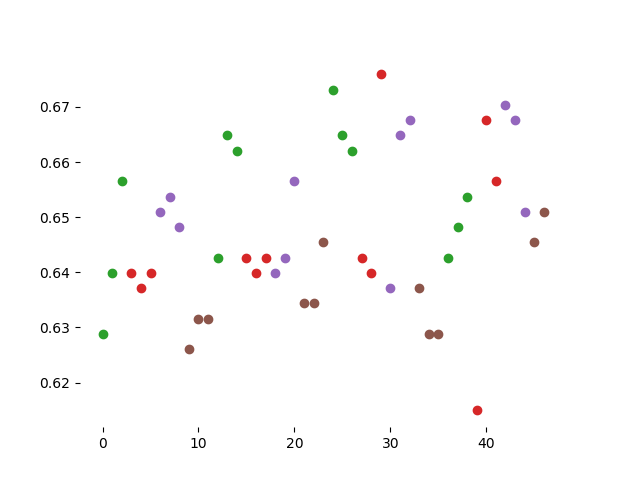

In [235]:
for x, (score, params) in enumerate(zip(cvres['mean_test_score'], cvres['params'])):
    color = str("C{}").format(params['max_depth'])
    plt.plot(x, score, marker='o', c=color)